# Additional Plots

In [1]:
from functionalities import filemanager as fm
from functionalities import plot as pl
from architecture import MNIST_autoencoder as mnist
from architecture import CIFAR_autoencoder as cifar
from architecture import CelebA_autoencoder as celeba
from functionalities import parameter_counter as count
from architecture import INN as INN

# MNIST

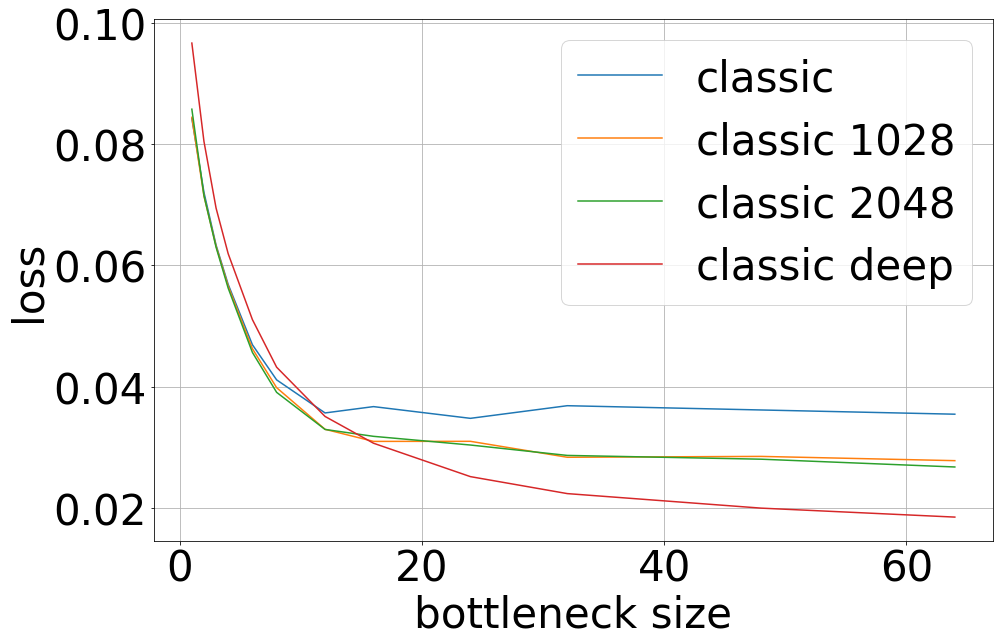

In [2]:
_, test = fm.load_variable("mnist_classic_bottleneck_bottleneck")
_, test_1024 = fm.load_variable("mnist_classic_1024_bottleneck_bottleneck")
_, test_2048 = fm.load_variable("mnist_classic_2048_bottleneck_bottleneck")
_, test_deep = fm.load_variable("mnist_classic_deep_bottleneck_bottleneck")


latent_dim_lst = [1, 2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 64]
inn_modelname = 'mnist_INN_glow_com_bottleneck'
_, l1_rec_test, _, _, _ = fm.load_variable('bottleneck_test_loss_{}'.format(inn_modelname), inn_modelname)

pl.plot(latent_dim_lst, [test, test_1024, test_2048, l1_rec_test], 'bottleneck size', 'loss', 
        ['classic', 'classic 1028', 'classic 2048', 'classic deep', 'INN'], '', 'MNIST_INN_classic_Comparison', font_size=42) 

Node r1 has following input dimensions:
	 Output #0 of node input: (1, 28, 28)

Node conv1 has following input dimensions:
	 Output #0 of node r1: (4, 14, 14)

Node conv2 has following input dimensions:
	 Output #0 of node conv1: (4, 14, 14)

Node conv3 has following input dimensions:
	 Output #0 of node conv2: (4, 14, 14)

Node r2 has following input dimensions:
	 Output #0 of node conv3: (4, 14, 14)

internal_size: 180
internal_size: 180
internal_size: 180
internal_size: 180
Node fc has following input dimensions:
	 Output #0 of node r2: (784,)

Node r3 has following input dimensions:
	 Output #0 of node fc: (784,)

Node r4 has following input dimensions:
	 Output #0 of node r3: (4, 14, 14)

Node output has following input dimensions:
	 Output #0 of node r4: (1, 28, 28)



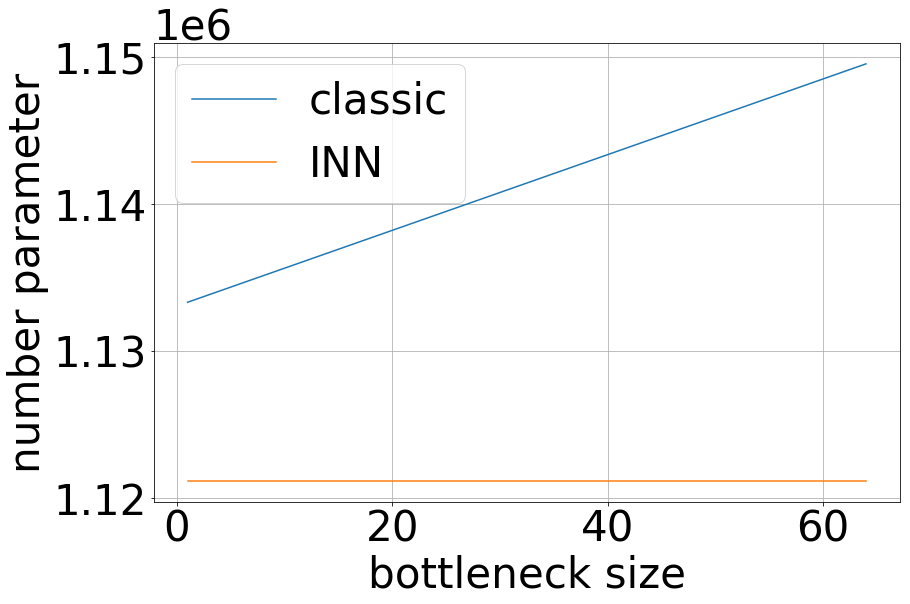

In [9]:
classic = []
classic_1024 = []
classic_2048 = []
classic_deep = []
for i in latent_dim_lst:
    model = mnist.mnist_autoencoder(i)
    num_para = count.count_para(model)
    classic.append(num_para)
    model = mnist.mnist_autoencoder_1024(i)
    num_para = count.count_para(model)
    classic_1024.append(num_para)
    model = mnist.mnist_autoencoder_2048(i)
    num_para = count.count_para(model)
    classic_2048.append(num_para)
    model = mnist.mnist_autoencoder_deep_1024(i)
    num_para = count.count_para(model)
    classic_deep.append(num_para)
    
    
inn_model = INN.mnist_inn_com()
inn = [count.count_para(inn_model)] * len(latent_dim_lst)

pl.plot(latent_dim_lst, [classic, inn], 'bottleneck size', 'number parameter', ['classic', 'INN'], 
        '', 'MNIST_parameter_Comparison', font_size=42, style='sci', axis='y', figsize=(15, 9)) 

# CIFAR-10

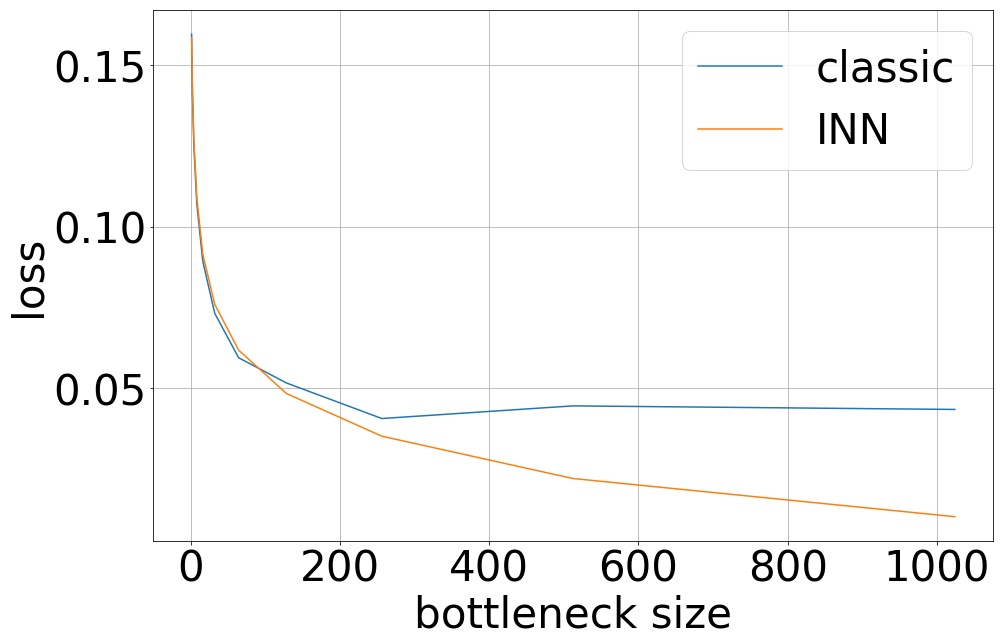

In [2]:
train, test = fm.load_variable("cifar_classic_bottleneck_bottleneck")

latent_dim_lst = [2 ** x for x in range(11)]
inn_modelname = 'cifar_INN_glow_com_bottleneck'
_, l1_rec_test, _, _, _ = fm.load_variable('bottleneck_test_loss_{}'.format(inn_modelname), inn_modelname)
_, l1_rec_train, _, _, _ = fm.load_variable('bottleneck_train_loss_{}'.format(inn_modelname), inn_modelname)

pl.plot(latent_dim_lst, [test, l1_rec_test], 'bottleneck size', 'loss', ['classic', 'INN'], 
        '', 'CIFAR_INN_classic_Comparison', font_size=42) 

Node r1 has following input dimensions:
	 Output #0 of node input: (3, 32, 32)

Node conv1 has following input dimensions:
	 Output #0 of node r1: (12, 16, 16)

Node conv2 has following input dimensions:
	 Output #0 of node conv1: (12, 16, 16)

Node conv3 has following input dimensions:
	 Output #0 of node conv2: (12, 16, 16)

Node r2 has following input dimensions:
	 Output #0 of node conv3: (12, 16, 16)

internal_size: 1000
internal_size: 1000
internal_size: 1000
internal_size: 1000
Node fc has following input dimensions:
	 Output #0 of node r2: (3072,)

Node r3 has following input dimensions:
	 Output #0 of node fc: (3072,)

Node r4 has following input dimensions:
	 Output #0 of node r3: (12, 16, 16)

Node output has following input dimensions:
	 Output #0 of node r4: (3, 32, 32)



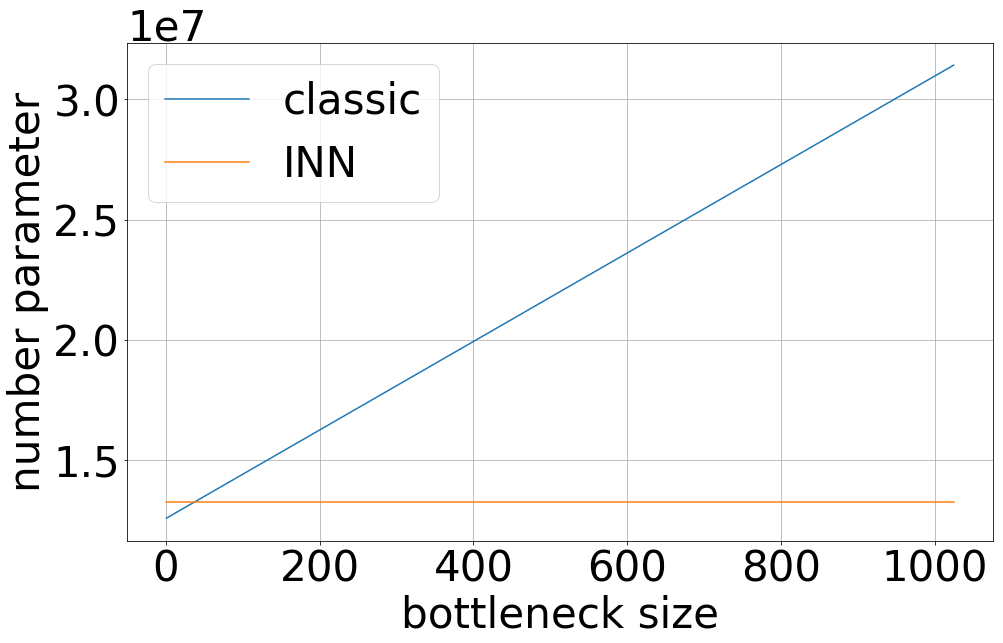

In [7]:
classic = []
for i in latent_dim_lst:
    model = cifar.cifar_autoencoder(i)
    num_para = count.count_para(model)
    classic.append(num_para)
    
inn_model = INN.cifar_inn_com()
inn = [count.count_para(inn_model)] * len(latent_dim_lst)

pl.plot(latent_dim_lst, [classic, inn], 'bottleneck size', 'number parameter', ['classic', 'INN'], 
        '', 'CIFAR_parameter_Comparison', font_size=42) 

# CelebA

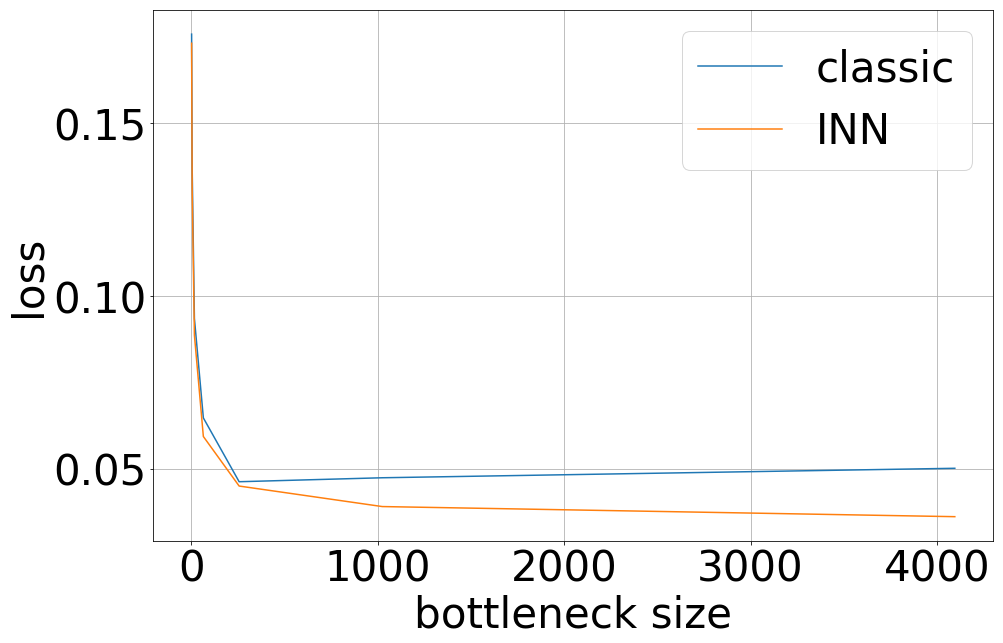

In [5]:
train, test = fm.load_variable("celeba_classic_bottleneck_bottleneck")

latent_dim_lst = [2 ** x for x in range(0, 11, 2)]
inn_modelname = 'celeba_INN_com_bottleneck'
_, l1_rec_test, _, _, _ = fm.load_variable('bottleneck_test_loss_{}'.format(inn_modelname), inn_modelname)
_, l1_rec_train, _, _, _ = fm.load_variable('bottleneck_train_loss_{}'.format(inn_modelname), inn_modelname)


pl.plot(latent_dim_lst, [test, l1_rec_test], 'bottleneck size', 'loss', ['classic', 'INN'], 
        '', 'CelebA_INN_classic_Comparison', font_size=42) 

Node r1 has following input dimensions:
	 Output #0 of node input: (3, 156, 128)

Node conv11 has following input dimensions:
	 Output #0 of node r1: (12, 78, 64)

Node conv12 has following input dimensions:
	 Output #0 of node conv11: (12, 78, 64)

Node conv13 has following input dimensions:
	 Output #0 of node conv12: (12, 78, 64)

Node r2 has following input dimensions:
	 Output #0 of node conv13: (12, 78, 64)

Node conv21 has following input dimensions:
	 Output #0 of node r2: (48, 39, 32)

Node conv22 has following input dimensions:
	 Output #0 of node conv21: (48, 39, 32)

Node conv23 has following input dimensions:
	 Output #0 of node conv22: (48, 39, 32)

Node r3 has following input dimensions:
	 Output #0 of node conv23: (48, 39, 32)

internal_size: 200
internal_size: 200
internal_size: 200
internal_size: 200
Node fc has following input dimensions:
	 Output #0 of node r3: (59904,)

Node r4 has following input dimensions:
	 Output #0 of node fc: (59904,)

Node r5 has following 

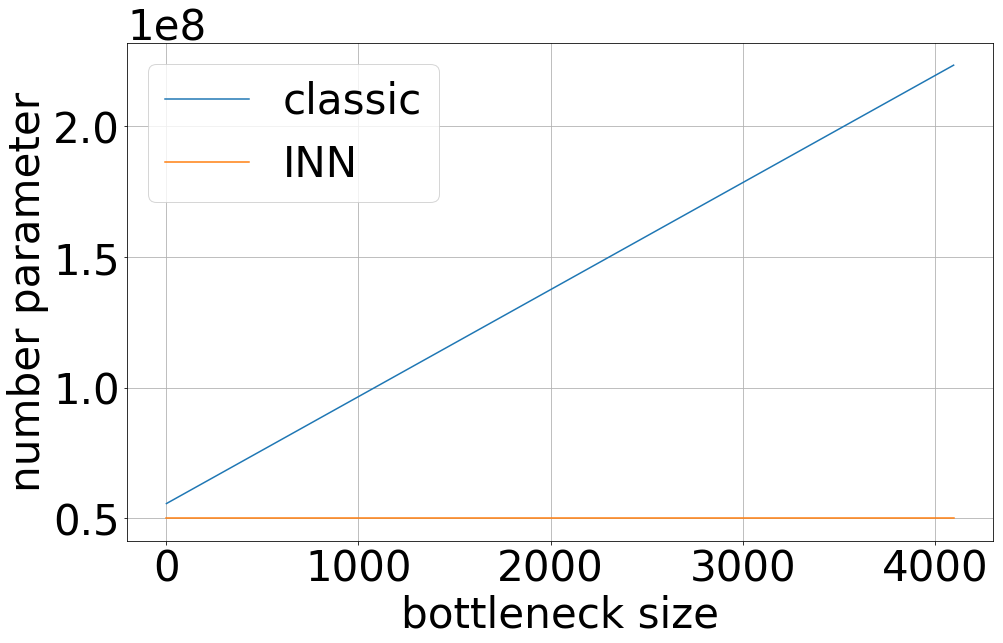

In [6]:
classic = []
for i in latent_dim_lst:
    model = celeba.celeba_autoencoder(i)
    num_para = count.count_para(model)
    classic.append(num_para)
    
inn_model = INN.celeba_inn_com()
inn = [count.count_para(inn_model)] * len(latent_dim_lst)

pl.plot(latent_dim_lst, [classic, inn], 'bottleneck size', 'number parameter', ['classic', 'INN'], 
        '', 'CelebA_parameter_Comparison', font_size=42) 